<a href="https://colab.research.google.com/github/Junseokee/Deep_Learning/blob/main/220908%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [1]:
from google.colab import drive
import os
import json
from tqdm import tqdm
import shutil
import re
from glob import glob
from google.colab import files

# 데이터셋 다운로드

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/trash
!pwd

/content/drive/MyDrive/trash
/content/drive/MyDrive/trash


In [4]:
# yolov5 모델 다운로드
#!git clone https://github.com/ultralytics/yolov5.git

In [5]:
%cd yolov5
#!pip install -r requirements.txt

/content/drive/MyDrive/trash/yolov5


In [6]:
import yaml
import torch
from IPython.display import Image, clear_output

In [ ]:
#%mkdir /content/drive/MyDrive/trash/yolov5/
!pwd

/content/drive/MyDrive/trash/yolov5


In [ ]:
# %mkdir ./img
# %mkdir ./label

# **데이터 셋 준비**


In [ ]:
from glob import glob

train_img_lst = glob('/content/drive/MyDrive/trash/yolov5/makedata3/images/*.jpg')
val_img_lst = glob('/content/drive/MyDrive/trash/yolov5/dataset/images/*.jpg')


with open('/content/drive/MyDrive/trash/yolov5/makedata3/train.txt','w') as f:
  f.write('\n'.join(train_img_lst)+'\n')

In [ ]:
print(len(train_img_lst),len(val_img_lst))

7391 1760


In [ ]:
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/trash/data.yaml

train: /content/drive/MyDrive/trash/yolov5/makedata3/images
val: /content/drive/MyDrive/trash/yolov5/dataset/images

nc: 7
names:
  0: 'polygon'
  1: 'styrofoam'
  2: 'glass'
  3: 'metal'
  4: 'pet_bottle'
  5: 'buoy'
  6: 'etc'

In [ ]:
%cat /content/drive/MyDrive/trash/data.yaml


train: /content/drive/MyDrive/trash/yolov5/makedata3/images
val: /content/drive/MyDrive/trash/yolov5/dataset/images

nc: 7
names:
  0: 'polygon'
  1: 'styrofoam'
  2: 'glass'
  3: 'metal'
  4: 'pet_bottle'
  5: 'buoy'
  6: 'etc'


In [ ]:
import yaml

with open('/content/drive/MyDrive/trash/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

  print(num_classes)

7


In [ ]:
!cat /content/drive/MyDrive/trash/yolov5/models/yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 7  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%%writetemplate /content/drive/MyDrive/trash/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/drive/MyDrive/trash/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 7  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%cd yolov5
!pwd

[Errno 2] No such file or directory: 'yolov5'
/content/drive/MyDrive/trash/yolov5
/content/drive/MyDrive/trash/yolov5


In [ ]:
# 데이터 학습
!python train.py --img 640 --batch 64 --epochs 100 --data /content/drive/MyDrive/trash/data.yaml --cfg /content/drive/MyDrive/trash/yolov5/models/custom_yolov5s.yaml --weight '/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results8/weights/best.pt' --name ocean_results --cache

train: weights=/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results8/weights/best.pt, cfg=/content/drive/MyDrive/trash/yolov5/models/custom_yolov5s.yaml, data=/content/drive/MyDrive/trash/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=ocean_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
requirements: ipython not found and is required by YOLOv5, attempting auto-update...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing obje

In [ ]:
%ls

classify/        export.py   makedata3/        runs/      tutorial.ipynb
CONTRIBUTING.md  hubconf.py  models/           setup.cfg  utils/
data/            LICENSE     __pycache__/      spam.txt   val.py
dataset/         makedata/   README.md         test/
detect.py        makedata2/  requirements.txt  train.py


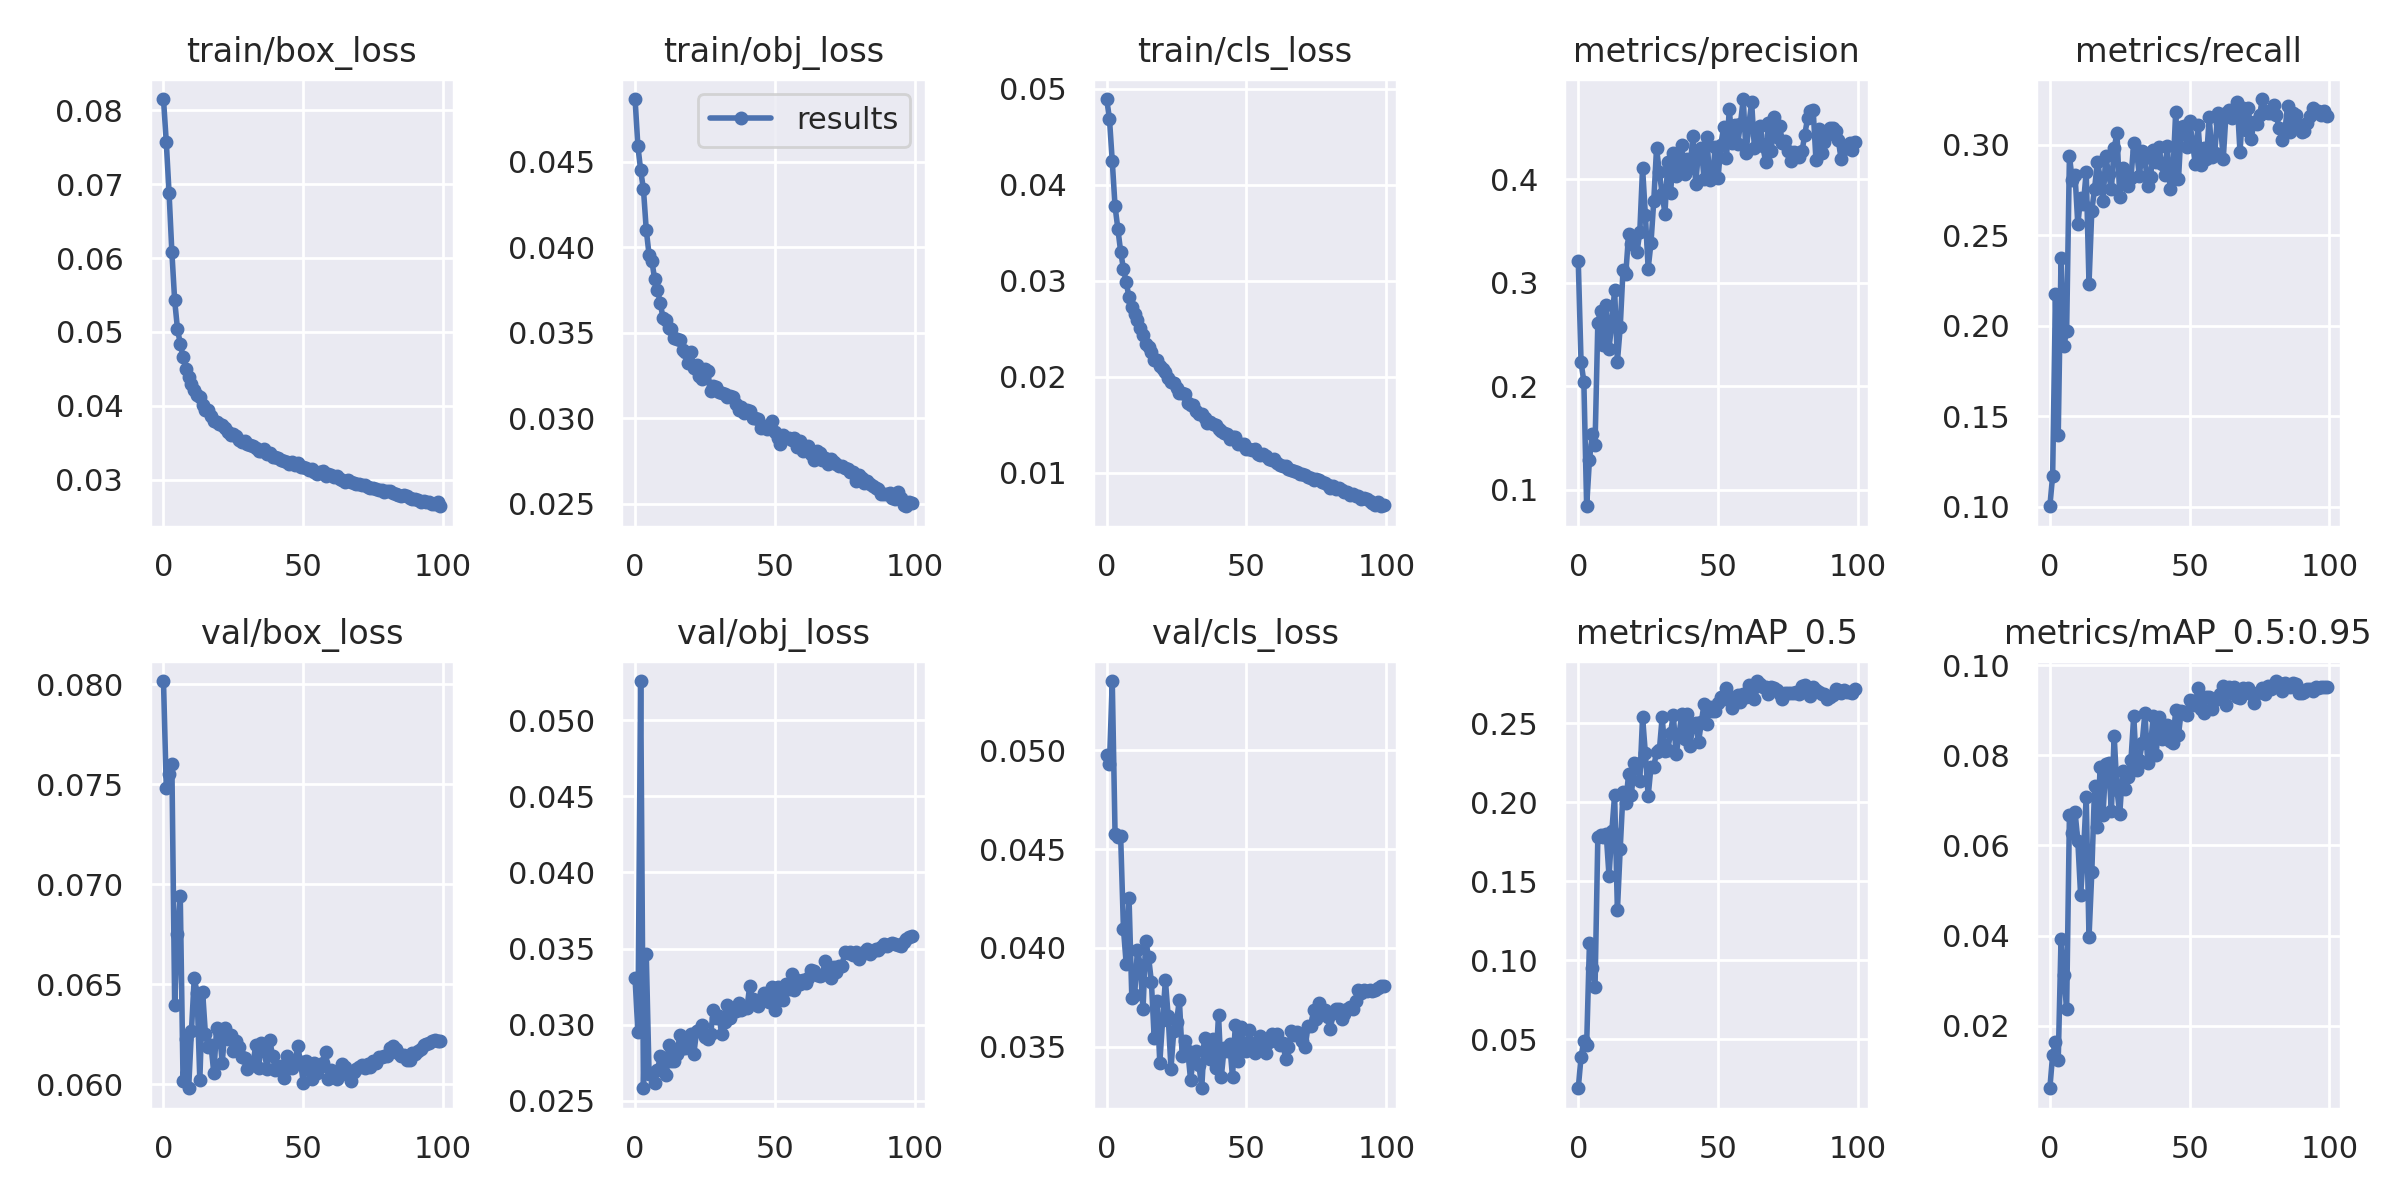

In [ ]:
Image(filename='/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/results.png', width=800)

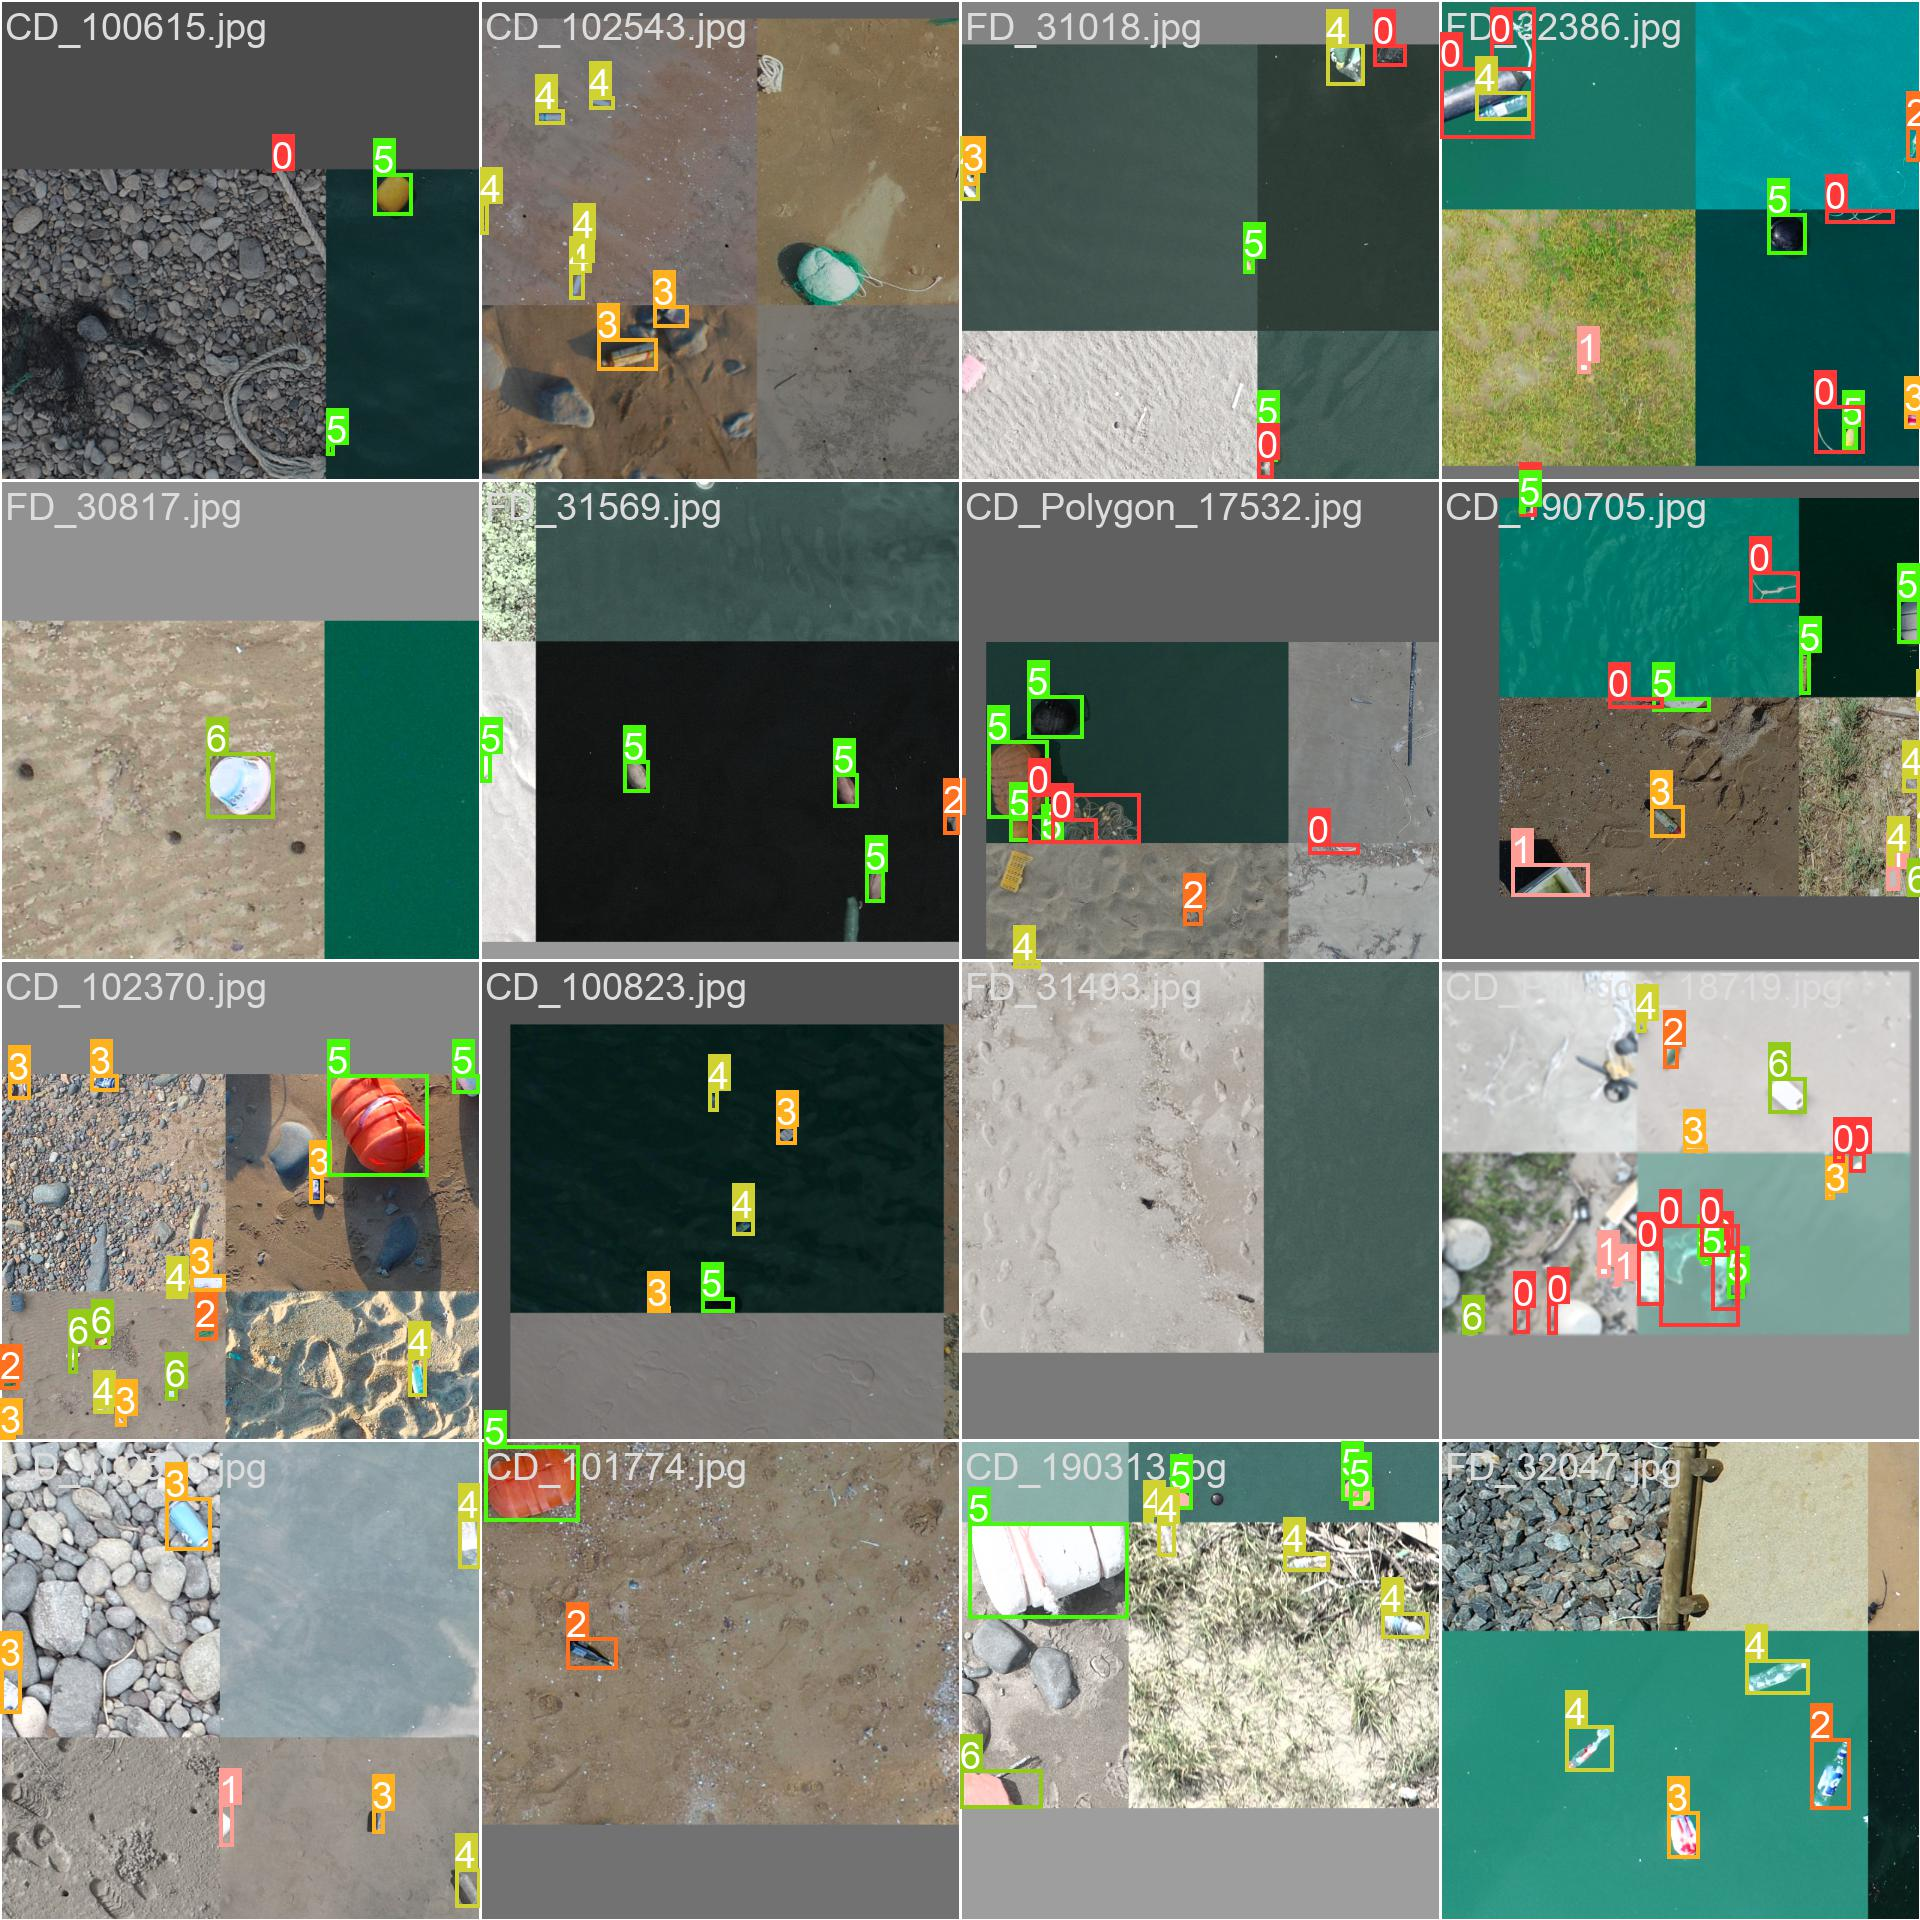

In [ ]:
# 디텍팅 확인
Image(filename='/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/train_batch0.jpg', width=800)

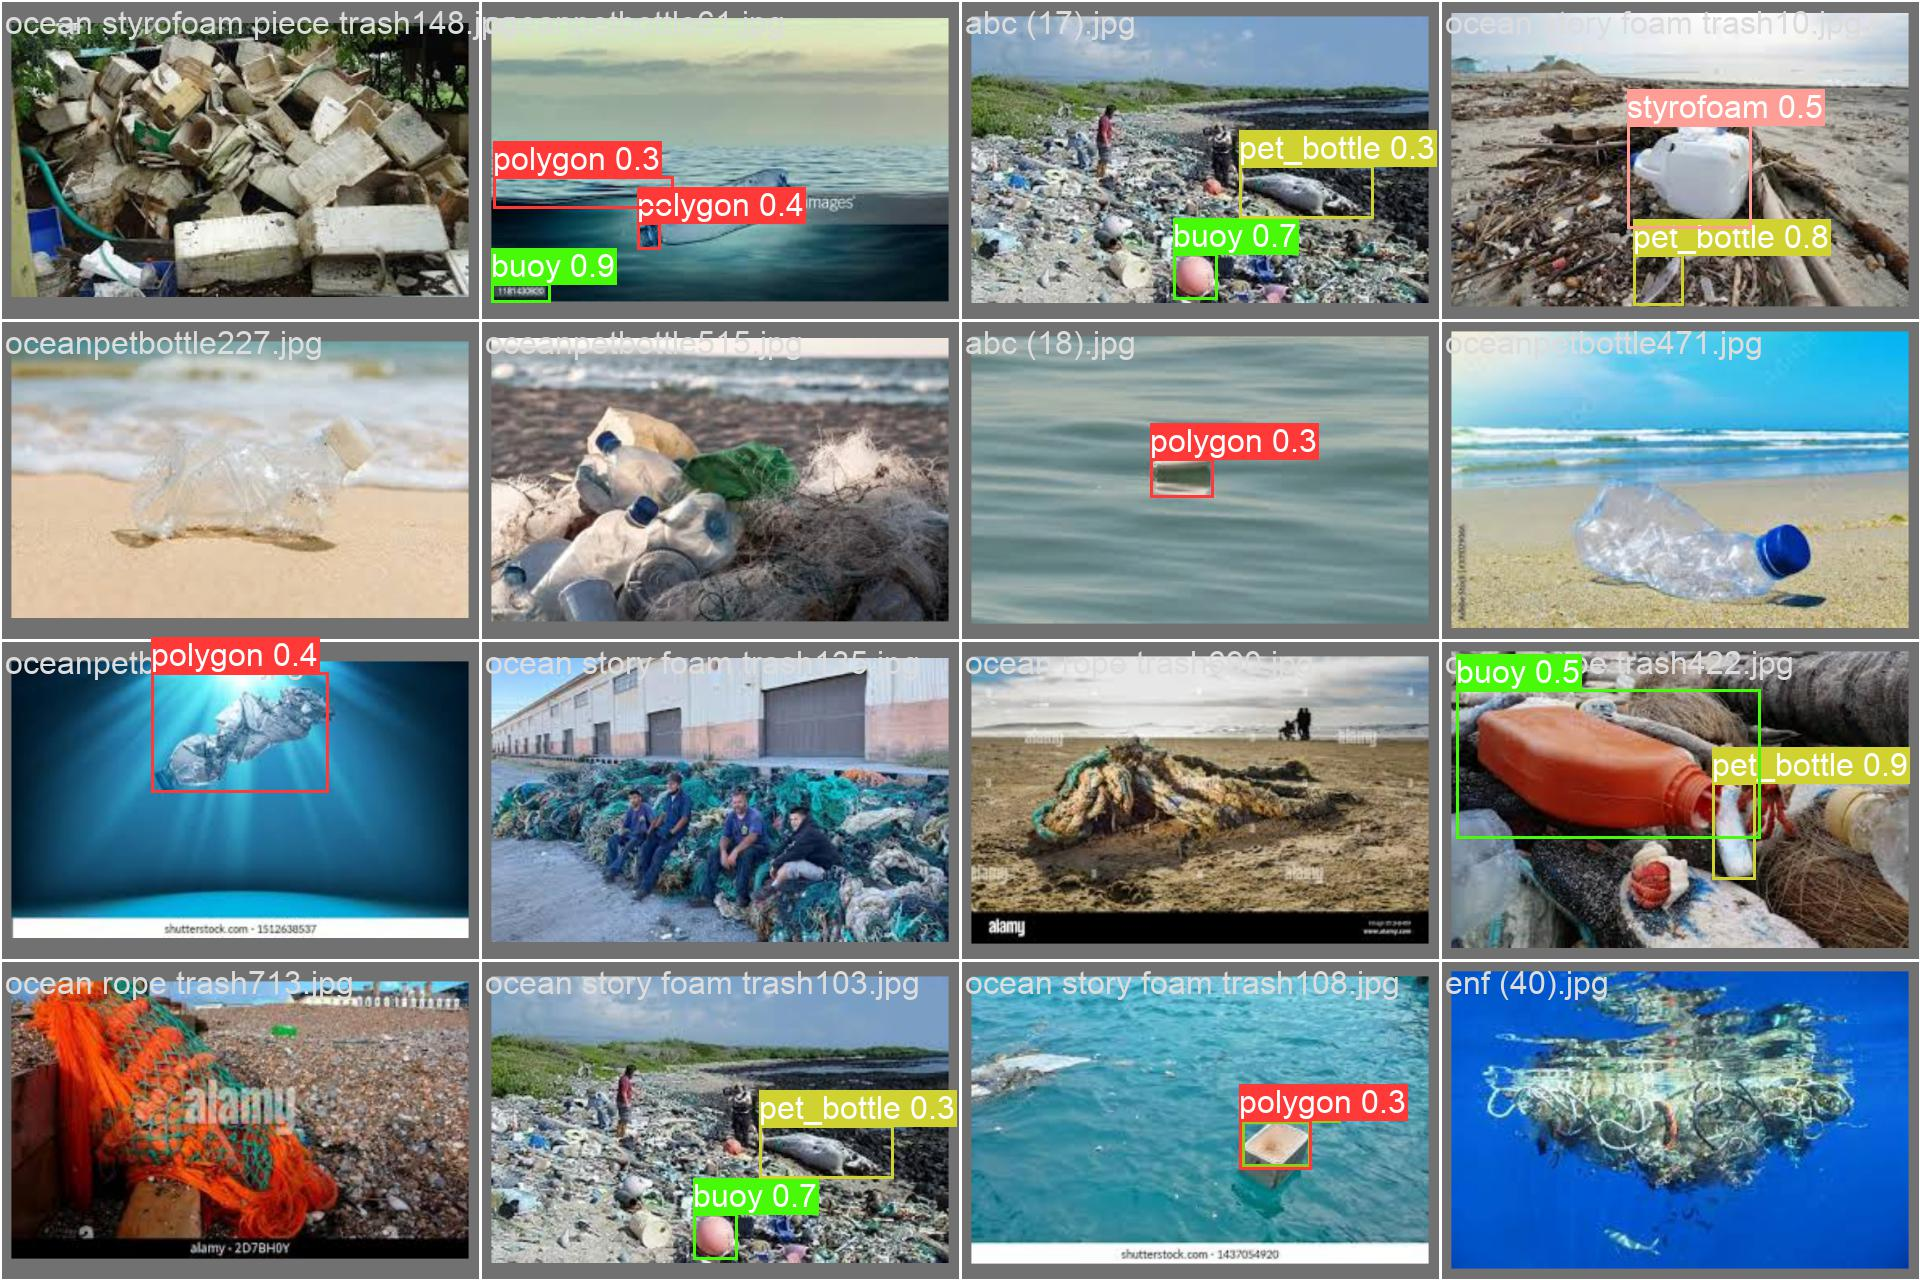

In [ ]:
# 라벨값 확인
Image(filename='/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/val_batch1_pred.jpg', width=800)

## 테스트

In [ ]:
import cv2
import os

vidcap=cv2.VideoCapture('/content/drive/MyDrive/trash/yolov5/test/test.mp4')

cnt=0
os.mkdir('/content/drive/MyDrive/trash/yolov5/test/trash_test')

while(vidcap.isOpened()):
  ret, image = vidcap.read()
  if ret == False:
    break

  if(int(vidcap.get(1)) % 10 == 0): # 10프레임마다 1장씩 저장
    print('Save frame number:' + str(int(vidcap.get(1))))
    cv2.imwrite('/content/drive/MyDrive/trash/yolov5/test/trash_test/test_%d.jpg'%cnt, image)
    cnt+=1

vidcap.release()
#cv2.destroyAllWindows()

Save frame number:10
Save frame number:20
Save frame number:30
Save frame number:40
Save frame number:50
Save frame number:60
Save frame number:70
Save frame number:80
Save frame number:90
Save frame number:100
Save frame number:110
Save frame number:120
Save frame number:130
Save frame number:140
Save frame number:150
Save frame number:160
Save frame number:170
Save frame number:180
Save frame number:190
Save frame number:200
Save frame number:210
Save frame number:220
Save frame number:230
Save frame number:240
Save frame number:250
Save frame number:260
Save frame number:270
Save frame number:280
Save frame number:290
Save frame number:300
Save frame number:310
Save frame number:320
Save frame number:330
Save frame number:340
Save frame number:350
Save frame number:360
Save frame number:370
Save frame number:380
Save frame number:390
Save frame number:400
Save frame number:410
Save frame number:420
Save frame number:430
Save frame number:440
Save frame number:450
Save frame number:4

In [ ]:
!ls /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results8/weights/

best.pt  last.pt


In [ ]:
# 가중치 파일 경로 지정
!python detect.py --source /content/drive/MyDrive/trash/yolov5/test/test.mp4 --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results9/weights/best.pt

detect: weights=['/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results9/weights/best.pt'], source=/content/drive/MyDrive/trash/yolov5/test/test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/3832) /content/drive/MyDrive/trash/yolov5/test/test.mp4: 384x640 1 etc, 12.0ms
video 1/1 (2/3832) /content/drive/MyDrive/trash/yolov5/test/test.mp4: 384x640 1 etc, 8.7ms
video 1/1 (3/3832) /content/drive/MyDrive/trash/yolov5/test/test.m

In [ ]:
!python detect.py --source /content/drive/MyDrive/trash/yolov5/test/test.mp4 --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt

detect: weights=['/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt'], source=/content/drive/MyDrive/trash/yolov5/test/test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/3832) /content/drive/MyDrive/trash/yolov5/test/test.mp4: 384x640 1 etc, 9.9ms
video 1/1 (2/3832) /content/drive/MyDrive/trash/yolov5/test/test.mp4: 384x640 1 etc, 8.0ms
video 1/1 (3/3832) /content/drive/MyDrive/trash/yolov5/test/test.m

In [9]:
!python val.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --data /content/drive/MyDrive/trash/data.yaml --img 640 --iou 0.65 --half

val: data=/content/drive/MyDrive/trash/data.yaml, weights=['/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients
val: Scanning '/content/drive/MyDrive/trash/yolov5/dataset/labels.cache' images and labels... 1753 found, 0 missing, 0 empty, 7 corrupt: 100% 1760/1760 [00:00<?, ?it/s]
train: WARNING: /content/drive/MyDrive/trash/yolov5/dataset/images/FD_100969.jpg: ignoring corrupt image/label: image file is truncated (44 bytes not processed)
train: WARNING: /content/drive/MyDrive/trash/yolov5/dataset/images/FD_

In [11]:
!python val.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --data /content/drive/MyDrive/trash/data.yaml --img 640 --task test

val: data=/content/drive/MyDrive/trash/data.yaml, weights=['/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients
Traceback (most recent call last):
  File "val.py", line 397, in <module>
    main(opt)
  File "val.py", line 370, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "val.py", line 173, in run
    dataloader = create_dataloader(data[task],
KeyError: 'test'


In [12]:
# 가중치 파일 경로 지정
!python detect.py --weights /content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/trash/data_source/test_500/test_500

detect: weights=['/content/drive/MyDrive/trash/yolov5/runs/train/ocean_results10/weights/best.pt'], source=/content/drive/MyDrive/trash/data_source/test_500/test_500, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-94-g1aea74c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients
image 1/491 /content/drive/MyDrive/trash/data_source/test_500/test_500/CD_10000.jpg: 448x640 2 metals, 5 buoys, 15.0ms
image 2/491 /content/drive/MyDrive/trash/data_source/test_500/test_500/CD_9400.jpg: 448x640 1 polygon, 1 glass, 2 pet_bottles, 1 etc, 

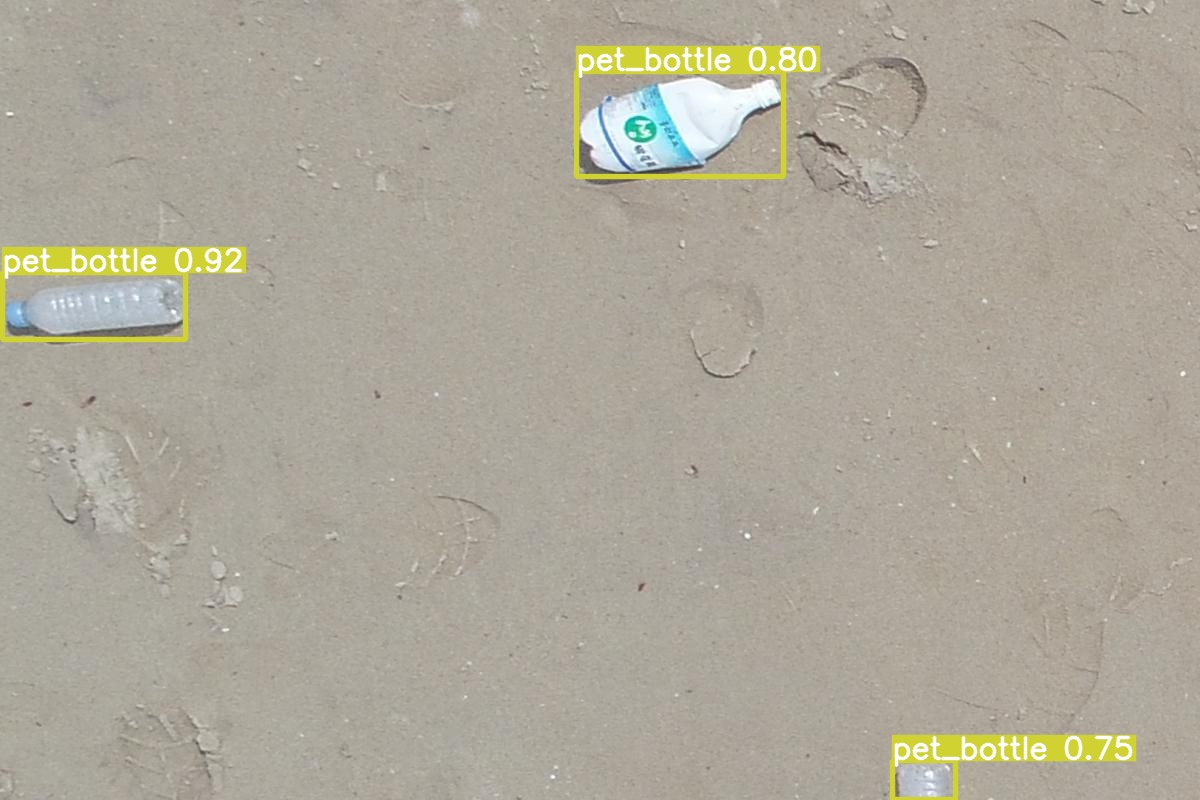

In [44]:
import random
from glob import glob

image_name = random.choice(glob('/content/drive/MyDrive/trash/yolov5/runs/detect/exp5/*jpg'))
Image(filename=image_name,width=800)

In [25]:
shutil.copy('/content/drive/MyDrive/trash/yolov5/runs/detect/exp3/test.mp4', 
            '/content/drive/MyDrive/trash')

'/content/drive/MyDrive/trash/test.mp4'